In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install ipdb
import sys
sys.path.insert(0,'..')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [7]:
from envs.key_room import KeyRoom, TaskOptions
import library.env_wrappers as wrappers
import minigrid
from pprint import pprint

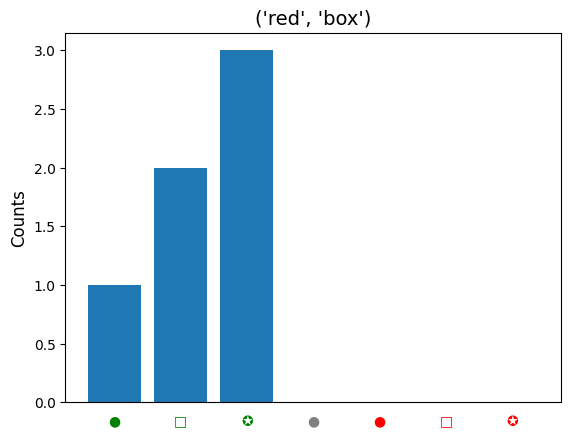

In [8]:
key = ('red', 'box')
data = {'green ball': 1,
  'green box': 2,
  'green key': 3,
  'grey ball': 0,
  'red ball': 0,
  'red box': 0,
  'red key': 0}

# Mapping of color names to colors
color_mapping = {
    'red': 'r',      # You can use any valid color specifier ('r' for red)
    'green': 'g',    # ('g' for green)
    'grey': 'gray'   # ('gray' for grey)
}

# Mapping of shape names to Unicode characters
shape_mapping = {
    'box': '\u25A1',    # Unicode for a square shape
    'ball': '\u25CF',   # Unicode for a circle shape
    'key': '\u272A'     # Unicode for a star shape
}

# Create subplots with fig and ax
fig, ax = plt.subplots()
values = data.values()
ax.bar(np.arange(len(values)), values)

# Customize key labels with colors and shapes
for i, (obj, _) in enumerate(data.items()):
    color_name, shape_name = obj.split()
    color = color_mapping.get(color_name, 'black')  # Default to black if color not found
    shape = shape_mapping.get(shape_name, '')  # Empty string if shape not found
    ax.text(i, -0.1, shape, rotation=0, ha='center', va='top', color=color)

ax.set_xticks([])
ax.set_ylabel("Counts", fontsize=12)
ax.set_title(str(key), fontsize=14)
plt.show()

In [9]:
import minigrid

train
['blue key', 'green key', 'grey key', 'purple key']
transfer
['purple box', 'blue box', 'green box', 'grey box']
----------
Task set: keys
{'blue ball': 1,
 'blue box': 2,
 'blue key': 0,
 'green ball': 4,
 'green box': 5,
 'green key': 3,
 'grey ball': 7,
 'grey box': 8,
 'grey key': 6,
 'purple ball': 10,
 'purple box': 11,
 'purple key': 9,
 'red ball': 13,
 'red box': 14,
 'red key': 12,
 'yellow ball': 16,
 'yellow box': 17,
 'yellow key': 15}
pick up the blue key
Task: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.task_option to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.task_option` for environment variables or `env.get_wrapper_attr('task_option')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.name_2_idx to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do 

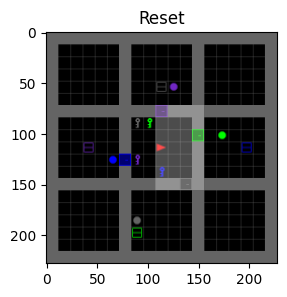

In [10]:
from pprint import pprint
env = KeyRoom(room_size=7, num_dists=0, fixed_door_locs=False, train_task_option=0, transfer_task_option=3)

name_fn = lambda o: f"{o.color} {o.type}"
# pprint(env._train_tasks)
print("train")
pprint([name_fn(o) for o in env._train_objects])
print("transfer")
pprint([name_fn(o) for o in env._transfer_objects])
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)
# Create a figure and axis for plotting
fig, ax = plt.subplots(1,1, figsize=(3,3))

obs, info = env.reset()
ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
ax.set_title(f"Reset")

print("-"*10)
print("Task set:", TaskOptions(env.task_option).name)
pprint(env.name_2_idx)
print(env.instruction.surface(env))
print("Task:", obs['task'])

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


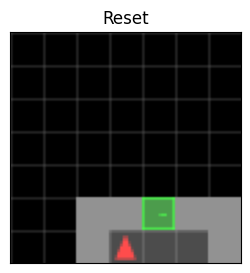

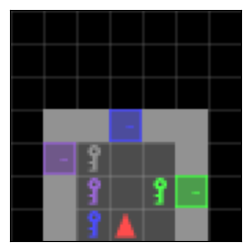

72: reward: 1.0 for pick up the green key
terminated: False
truncated: False
cumulants: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
task: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
{'blue ball': 1,
 'blue box': 2,
 'blue key': 0,
 'green ball': 4,
 'green box': 5,
 'green key': 3,
 'grey ball': 7,
 'grey box': 8,
 'grey key': 6,
 'purple ball': 10,
 'purple box': 11,
 'purple key': 9,
 'red ball': 13,
 'red box': 14,
 'red key': 12,
 'yellow ball': 16,
 'yellow box': 17,
 'yellow key': 15}


/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.instruction to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.instruction` for environment variables or `env.get_wrapper_attr('instruction')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.room_from_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.room_from_pos` for environment variables or `env.get_wrapper_attr('room_from_pos')` that will search the reminding wrappers.
  logger.warn(
/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.agent_pos to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable 

AttributeError: 'NoneType' object has no attribute 'color'

In [49]:
def prep_ax(ax):
    ax.clear()  # Clear the previous plot
    # Remove ticks on both the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Optionally, you can also remove the tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
env = KeyRoom(room_size=5, num_dists=0, fixed_door_locs=True, train_task_option=0, transfer_task_option=0)
env = minigrid.wrappers.DictObservationSpaceWrapper(env)
# env = wrappers.GotoOptionsWrapper(env)
# env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)
env = minigrid.wrappers.RGBImgPartialObsWrapper(env, tile_size=12)

# Create a figure and axis for plotting
fig, ax = plt.subplots(1,1, figsize=(3,3))

obs, info = env.reset()
prep_ax(ax)
ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)
ax.set_title(f"Reset")


nactions = env.action_space

for t in range(1000):
    # actions = list(range(info['nactions']))
    actions = list(range(env.action_space.n))
    # print(t, "="*10, f'{len(actions)} actions', "="*10)
    # possible_actions = info['actions']
    # pprint(possible_actions)
    # pprint(env.prior_visible_objects)
    action = random.choice(actions)
    # print(f"Action taken {action}:", info['actions'][action])
    obs, reward, done, truncated, info = env.step(action)
    if reward > 0 or done:
        # Extract the image from the observation
        image = obs['image']
        
        # Display the image with the action as the title
        fig, ax = plt.subplots(1,1, figsize=(3,3))
        prep_ax(ax)
        ax.imshow(image)  # Assuming image has shape (C, H, W)
        # ax.set_title(f"Action: {str(possible_actions[action])}")
    
        plt.show()
        plt.pause(0.1)  # Pause for a moment to display the image

        print(f"{t}: reward: {reward} for {env.instruction.surface(env)}")
        print(f"terminated: {done}")
        print(f"truncated: {truncated}")
        print(f"cumulants: {obs['state_features']}")
        print(f"task: {obs['task']}")
        pprint(env.name_2_idx)
        print(env.carrying.color, env.carrying.type)

        if done:
            print("BREAKING")
            break
            
print('done')
# Close the plot window at the end
plt.close()

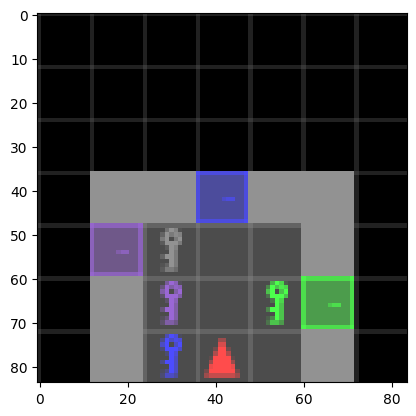

In [50]:
plt.imshow(image)
plt.show()

In [28]:
info['actions']

{0: <Actions.left: 0>,
 1: <Actions.right: 1>,
 2: <Actions.forward: 2>,
 3: <Actions.pickup: 3>,
 4: <Actions.drop: 4>,
 5: <Actions.toggle: 5>,
 6: 'go to blue key'}

/Users/wilka/miniforge3/envs/humansf/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_frame to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_frame` for environment variables or `env.get_wrapper_attr('get_frame')` that will search the reminding wrappers.
  logger.warn(


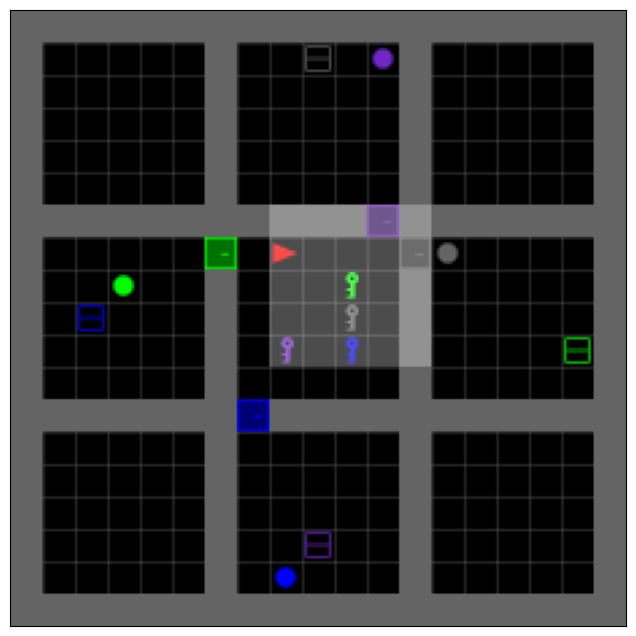

In [16]:
def prep_ax(ax):
    ax.clear()  # Clear the previous plot
    # Remove ticks on both the x and y axes
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Optionally, you can also remove the tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    
env = KeyRoom(num_dists=0, fixed_door_locs=False)
env = minigrid.wrappers.RGBImgObsWrapper(env, tile_size=12)
obs, _ = env.reset()
fig, ax = plt.subplots(1,1, figsize=(8,8))
prep_ax(ax)
ax.imshow(obs['image'])  # Assuming image has shape (C, H, W)

# visualize_random_actions(env, n=1)